In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt

from utils.funs import count_outliers
from utils.symmetry_scores import get_scores_full

from transformers import AutoModelForCausalLM

/opt/homebrew/Caskroom/miniconda/base/envs/attention-geometry/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dir = '../../../../_data/fig-symmetry-language-models/full-models/LLAMA2-query-key.pkl'

if os.path.isfile(dir):
    with open(dir, 'rb') as file:
        models = pickle.load(file)
else: models = {}

In [3]:
## missing LLAMA 2 70B for memory requirement reasons + presence of Grouped Query Attention (GQA)

path = ["model.layers[", "].self_attn.q_proj.weight", "].self_attn.k_proj.weight"]

'LLAMA 2 7b (l = 32, d = 4096, h = 32 ; tot num parameters 7B)'
dh = 128
l = 32
d = 4096
h = d // dh

model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf")
score_List= get_scores_full(d, l, h, dh, model, path)
models['LLAMA-7b'] = [l, d, h, dh, score_List]

# 'LLAMA 2 13b (l = 32, d = 4096, h = 32 ; tot num parameters 13B)'
# dh = 128
# l = 40
# d = 5120
# h = d // dh

# model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-13b-hf")
# score_List= get_scores_full(d, l, h, dh, model, path)
# models['LLAMA-13b'] = [l, d, h, dh, score_List]

# 'LLAMA 2 7b chat (l = 32, d = 4096, h = 32 ; tot num parameters 7B)'
# dh = 128
# l = 32
# d = 4096
# h = d // dh

# model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-hf")
# score_List= get_scores_full(d, l, h, dh, model, path)
# models['LLAMA-7b-chat'] = [l, d, h, dh, score_List]

# 'LLAMA 2 7b chat (l = 32, d = 4096, h = 32 ; tot num parameters 13B)'
# dh = 128
# l = 40
# d = 5120
# h = d // dh

# model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-13b-hf")
# score_List= get_scores_full(d, l, h, dh, model, path)
# models['LLAMA-13b-chat'] = [l, d, h, dh, score_List]

Loading checkpoint shards: 100%|██████████| 2/2 [00:18<00:00,  9.08s/it]


In [4]:
'save'
with open(dir, 'wb') as file:
    pickle.dump(models, file)

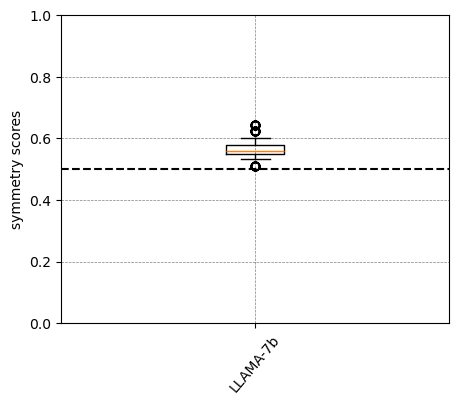

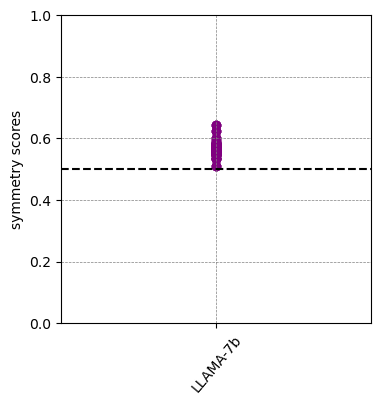

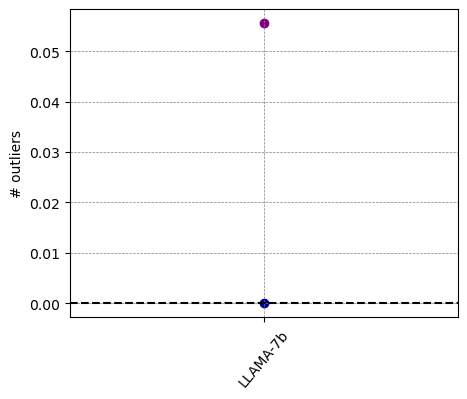

In [5]:
from utils.visualization import symmetry_score_boxplot, symmetry_score_scatter, symmetry_score_outliers

symmetry_score_boxplot(models)
symmetry_score_scatter(models)
symmetry_score_outliers(models)